**Dataset anaslysis**


In [1]:
import pandas as pd
import dateutil
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

In [2]:
sns.set_style("whitegrid")

In [3]:
BASE_DIR = Path('EDA.ipynb').resolve().parent.parent
DATA_DIR = BASE_DIR.joinpath('data/TOLOKA_Markup')

FILE_NAME_1 = "assignments_from_pool_35355351__11-09-2022.tsv"
FILE_NAME_2 = "assignments_from_pool_35369313__12-09-2022.tsv"
FILE_NAME_3 = "assignments_from_pool_35432328__15-09-2022.tsv"
FILE_NAME_4 = "assignments_from_pool_35480971__19-09-2022.tsv"

FILE_1 = DATA_DIR.joinpath(FILE_NAME_1)
FILE_2 = DATA_DIR.joinpath(FILE_NAME_2)
FILE_3 = DATA_DIR.joinpath(FILE_NAME_3)
FILE_4 = DATA_DIR.joinpath(FILE_NAME_4)

In [4]:
df1 = pd.read_csv(FILE_1, sep="\t")
df2 = pd.read_csv(FILE_2, sep="\t")
df3 = pd.read_csv(FILE_3, sep="\t")
df4 = pd.read_csv(FILE_4, sep="\t")

data = pd.concat([df1, df2, df3, df4])

data.head(10)

,INPUT:exp_id,INPUT:wordset,INPUT:model_id,INPUT:topic_id,INPUT:dataset_name,INPUT:correct_bad_words,OUTPUT:quality,OUTPUT:bad_words,OUTPUT:topic_name,OUTPUT:golden_bad_words,...,ASSIGNMENT:task_suite_id,ASSIGNMENT:worker_id,ASSIGNMENT:status,ASSIGNMENT:started,ASSIGNMENT:submitted,ASSIGNMENT:accepted,ASSIGNMENT:rejected,ASSIGNMENT:skipped,ASSIGNMENT:expired,ASSIGNMENT:reward
0,28.0,driver sound running anybody memory wonder err...,631ba815291a690c5875365a,main24,20newsgroups,NaN,rather_bad,"{""driver"":false,""sound"":false,""running"":false,...",NaN,True,...,00021b7ad7--631df4b9a3d75c31d7b50ce1,35c9dec005edb17d8cc11946f9bc4b0f,APPROVED,2022-09-11T14:46:17.435,2022-09-11T14:48:35.368,2022-09-11T14:48:35.368,NaN,NaN,NaN,0.05
1,28.0,argument colorado conclusion music letter fall...,631bb8282d85fb2da960a6a5,main72,20newsgroups,NaN,bad,"{""argument"":false,""colorado"":false,""conclusion...",NaN,True,...,00021b7ad7--631df4b9a3d75c31d7b50ce1,35c9dec005edb17d8cc11946f9bc4b0f,APPROVED,2022-09-11T14:46:17.435,2022-09-11T14:48:35.368,2022-09-11T14:48:35.368,NaN,NaN,NaN,0.05
2,28.0,love uiuc cwru thought guess wrong sorry frank...,631b95224ac2fcd506e4781a,main4,20newsgroups,NaN,rather_bad,"{""love"":false,""uiuc"":false,""cwru"":false,""thoug...",NaN,True,...,00021b7ad7--631df4b9a3d75c31d7b50ce1,35c9dec005edb17d8cc11946f9bc4b0f,APPROVED,2022-09-11T14:46:17.435,2022-09-11T14:48:35.368,2022-09-11T14:48:35.368,NaN,NaN,NaN,0.05
3,28.0,engine modem rocket phone model yeast level fr...,631ba1dba6fa8975eb579abd,main13,20newsgroups,NaN,rather_bad,"{""engine"":false,""modem"":false,""rocket"":false,""...",NaN,True,...,00021b7ad7--631df4b9a3d75c31d7b50ce1,35c9dec005edb17d8cc11946f9bc4b0f,APPROVED,2022-09-11T14:46:17.435,2022-09-11T14:48:35.368,2022-09-11T14:48:35.368,NaN,NaN,NaN,0.05
4,28.0,turkish turkey turk armenia greek nazi azeri s...,631b96bea5a57837b841b5d1,main28,20newsgroups,NaN,rather_good,"{""turkish"":false,""turkey"":false,""turk"":false,""...",Race,True,...,00021b7ad7--631df4b9a3d75c31d7b50ce1,35c9dec005edb17d8cc11946f9bc4b0f,APPROVED,2022-09-11T14:46:17.435,2022-09-11T14:48:35.368,2022-09-11T14:48:35.368,NaN,NaN,NaN,0.05
5,28.0,country nazi germany german land europe money ...,631bb6faa5a57837b841d979,main3,20newsgroups,NaN,rather_good,"{""country"":false,""nazi"":false,""germany"":true,""...",Germany,True,...,00021b7ad7--631df4b9a3d75c31d7b50ce1,35c9dec005edb17d8cc11946f9bc4b0f,APPROVED,2022-09-11T14:46:17.435,2022-09-11T14:48:35.368,2022-09-11T14:48:35.368,NaN,NaN,NaN,0.05
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,28.0,attack lebanese muslim hernlem israeli left tr...,631b96bea5a57837b841b5d1,main1,20newsgroups,NaN,good,"{""attack"":false,""lebanese"":false,""muslim"":fals...",War,True,...,00021b7ad7--631df4c241d72e6d49540210,9c19d68db298943ca43bb07b3d320ac7,APPROVED,2022-09-11T14:46:26.065,2022-09-11T14:48:16.890,2022-09-11T14:48:16.890,NaN,NaN,NaN,0.05
8,28.0,curve drug create libertarian email hold graph...,631bb32427e1a64b30543798,main44,20newsgroups,NaN,bad,"{""curve"":false,""drug"":false,""create"":false,""li...",NaN,True,...,00021b7ad7--631df4c241d72e6d49540210,9c19d68db298943ca43bb07b3d320ac7,APPROVED,2022-09-11T14:46:26.065,2022-09-11T14:48:16.890,2022-09-11T14:48:16.890,NaN,NaN,NaN,0.05
9,28.0,nasa earth orbit mission launch satellite moon...,631b9549939bfaaca5600f20,main8,20newsgroups,NaN,good,"{""nasa"":false,""earth"":false,""orbit"":false,""mis...",Space exploration,True,...,00021b7ad7--631df4c241d72e6d49540210,9c19d68db298943ca43bb07b3d320ac7,APPROVED,2022-09-11T14:46:26.065,2022-09-11T14:48:16.890,2022-09-11T14:48:16.890,NaN,NaN,NaN,0.05


## Data Preprocessing

In [5]:
# check homogeneity of majority vote
def check_homogeneity(assessments):
    counts = Counter(assessments)
    counter_sum = counts['good'] + counts['rather_good'] + counts['bad'] + counts['rather_bad']
    return round(np.max(list(counts.values())) / counter_sum, 1)

In [6]:
def get_assessment(assessments):
    counter = Counter(assessments)
    most_common = counter.most_common(2)

    good, bad = ['good', 'rather_good'], ['bad', 'rather_bad']

    if len(most_common) != 1 and most_common[0][1] == most_common[1][1]:
        if most_common[0][0] in good and most_common[1][0] in good:
            return 1
        elif most_common[0][0] in bad and most_common[1][0] in bad:
            return -1
        else:
            return 0
    else:
        return mapping[most_common[0][0]]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25922 entries, 0 to 9906
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   INPUT:exp_id                  22216 non-null  float64
 1   INPUT:wordset                 22216 non-null  object 
 2   INPUT:model_id                22216 non-null  object 
 3   INPUT:topic_id                22216 non-null  object 
 4   INPUT:dataset_name            22216 non-null  object 
 5   INPUT:correct_bad_words       0 non-null      float64
 6   OUTPUT:quality                20854 non-null  object 
 7   OUTPUT:bad_words              20854 non-null  object 
 8   OUTPUT:topic_name             9015 non-null   object 
 9   OUTPUT:golden_bad_words       20854 non-null  object 
 10  OUTPUT:golden_binary_quality  20854 non-null  object 
 11  GOLDEN:quality                0 non-null      float64
 12  GOLDEN:bad_words              0 non-null      float64
 13  GO

In [8]:
print(data.columns)

Index(['INPUT:exp_id', 'INPUT:wordset', 'INPUT:model_id', 'INPUT:topic_id',
       'INPUT:dataset_name', 'INPUT:correct_bad_words', 'OUTPUT:quality',
       'OUTPUT:bad_words', 'OUTPUT:topic_name', 'OUTPUT:golden_bad_words',
       'OUTPUT:golden_binary_quality', 'GOLDEN:quality', 'GOLDEN:bad_words',
       'GOLDEN:topic_name', 'GOLDEN:golden_bad_words',
       'GOLDEN:golden_binary_quality', 'HINT:text', 'HINT:default_language',
       'ASSIGNMENT:link', 'ASSIGNMENT:task_id', 'ASSIGNMENT:assignment_id',
       'ASSIGNMENT:task_suite_id', 'ASSIGNMENT:worker_id', 'ASSIGNMENT:status',
       'ASSIGNMENT:started', 'ASSIGNMENT:submitted', 'ASSIGNMENT:accepted',
       'ASSIGNMENT:rejected', 'ASSIGNMENT:skipped', 'ASSIGNMENT:expired',
       'ASSIGNMENT:reward'],
      dtype='object')


In [9]:
# Remove rows with NaNs
data.dropna(axis=0, how='all', inplace=True)
# Remove columns with NaNs
data.dropna(axis=1, how='all', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22216 entries, 0 to 9905
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   INPUT:exp_id                  22216 non-null  float64
 1   INPUT:wordset                 22216 non-null  object 
 2   INPUT:model_id                22216 non-null  object 
 3   INPUT:topic_id                22216 non-null  object 
 4   INPUT:dataset_name            22216 non-null  object 
 5   OUTPUT:quality                20854 non-null  object 
 6   OUTPUT:bad_words              20854 non-null  object 
 7   OUTPUT:topic_name             9015 non-null   object 
 8   OUTPUT:golden_bad_words       20854 non-null  object 
 9   OUTPUT:golden_binary_quality  20854 non-null  object 
 10  GOLDEN:golden_binary_quality  3706 non-null   object 
 11  ASSIGNMENT:link               22216 non-null  object 
 12  ASSIGNMENT:task_id            22216 non-null  object 
 13  AS

In [10]:
print("The number of duplicate rows:", sum(data.duplicated()))

The number of duplicate rows: 0


In [11]:
print("Example of the wordset:", data.iloc[0]["INPUT:wordset"])

Example of the wordset: driver sound running anybody memory wonder error fine works appreciate check tape machine sorry utexas


In [12]:
# Check skipped responses

print(f'The number of skipped responses: {len(data[data["ASSIGNMENT:skipped"].notnull()])}')
# Remove all skipped responses
data = data[data["ASSIGNMENT:skipped"].isna()]

The number of skipped responses: 36


In [13]:
# Check expared responses

print(f'The number of expared responses: {len(data[data["ASSIGNMENT:expired"].notnull()])}')
# Remove all expired responses
data = data[data["ASSIGNMENT:expired"].isna()]

The number of expared responses: 1326


In [14]:
# Calculate the duration of the response

# Convert from str to datetime
to_datetime = lambda x: dateutil.parser.parse(x)

data["ASSIGNMENT:submitted"] = [to_datetime(date) for date in data["ASSIGNMENT:submitted"].values]
data["ASSIGNMENT:started"] = [to_datetime(date) for date in data["ASSIGNMENT:started"].values]

data["ASSIGMNENT:time"] = data["ASSIGNMENT:submitted"] - data["ASSIGNMENT:started"]

to_seconds = lambda x: x.seconds 

data["ASSIGMNENT:time"] = [to_seconds(date) for date in data["ASSIGMNENT:time"]]
time_diff = data["ASSIGMNENT:time"].value_counts(ascending=True)

print(f"Minimum response time: {min(time_diff)} sec")
print(f"Maximum response time: {max(time_diff)} sec")

Minimum response time: 5 sec
Maximum response time: 168 sec


In [15]:
# Check the number of experts
print(f'The number of experts: {len(set(data["ASSIGNMENT:worker_id"]))}')

The number of experts: 912


In [16]:
# Remove rows with empty 'OUTPUT:quality' field
data.dropna(subset=['OUTPUT:quality'], inplace=True)

In [17]:
# Check the dataset names
print("Datasets in the data:", set(data["INPUT:dataset_name"]))

Datasets in the data: {'amazon_food', '20newsgroups'}


In [18]:
# Check the number of models
print(f"The number of topic model: {data['INPUT:model_id'].unique().size}")


The number of topic model: 200


In [19]:
# Check the number of unique topics
topics = data['INPUT:wordset'].unique()
topics = [topic.split() for topic in topics]

topics_lst = []  # all topics
for topic in topics:
    topics_lst.extend(topic)

print(f"The number of unique topics in terms of word set: {len(set(topics_lst))}")

The number of unique topics in terms of word set: 3246


In [20]:
# Check the number of unique worsets
print("The number of unique worsets:", len(set(data["INPUT:wordset"])))

The number of unique worsets: 3861


### Сreate a dataset of topics and their assessments

wordset + model + dataset_name aggregation

In [21]:
assessments = data.groupby(['INPUT:wordset', 'INPUT:model_id', 'INPUT:dataset_name'])['OUTPUT:quality'].apply(list).reset_index()
assessments.sample(5)

,INPUT:wordset,INPUT:model_id,INPUT:dataset_name,OUTPUT:quality
1503,food gatech rochester purdue prism language ta...,631bb8e676cc1f8ca8886ea6,20newsgroups,"[rather_bad, bad, bad, bad, bad]"
3244,put thought anything something nothing else st...,632315134bb36217238e194a,amazon_food,"[bad, rather_good, good]"
3174,printer radio design print signal quality engi...,631b8a9b17dc5fce149d08a8,20newsgroups,"[good, good, good, good, good]"
4303,without help morning son oatmeal skin warm dai...,632311adb9644773b836ff99,amazon_food,"[bad, rather_bad, good]"
1345,especially often mind set instant five decent ...,6323133ccda35d2841a0215c,amazon_food,"[bad, bad, bad]"


In [22]:
assessments['homogeneity'] = assessments['OUTPUT:quality'].apply(lambda x: check_homogeneity(x))
assessments.sample(5)

,INPUT:wordset,INPUT:model_id,INPUT:dataset_name,OUTPUT:quality,homogeneity
2081,kill child weapon crime fire firearm woman dea...,631b8a30b0950bb2e7890f63,20newsgroups,"[good, good, good, good, rather_good]",0.8
4162,water internet marc tower heat nuclear plant c...,631ba4ee31be382c45bf3734,20newsgroups,"[good, bad, bad, bad, rather_bad]",0.6
2579,news email usenet anonymous message service ne...,631bb6faa5a57837b841d979,20newsgroups,"[rather_good, good, rather_good, good, rather_...",0.6
4058,turkish turk genoc soviet turkey russian armen...,631ba91879ac792348a7f218,20newsgroups,"[good, good, good, good, bad]",0.8
1803,homosexual andrew james cleveland cwru lost ch...,631b9549939bfaaca5600f20,20newsgroups,"[bad, rather_bad, bad, rather_bad, bad]",0.6


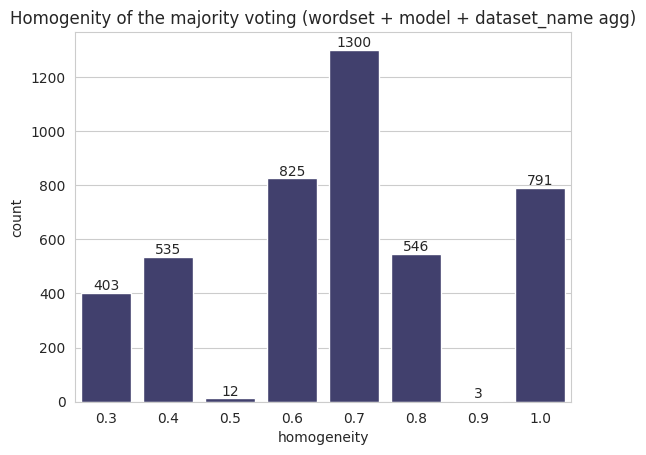

In [23]:
ax = sns.countplot(data=assessments, x="homogeneity", color="#3A3875")
ax.set_title("Homogenity of the majority voting (wordset + model + dataset_name agg)")
ax.bar_label(ax.containers[0])

plt.show()


In the majority of cases, the assessors' answers are somewhat similar.

In [24]:
mapping = {'bad': -2,
           'rather_bad': -1,
           'rather_good': 1,
           'good': 2}

# get final assessment
assessments['assessment'] = assessments['OUTPUT:quality'].apply(lambda x: get_assessment(x))

/tmp/ipykernel_21916/1075249190.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_labels)


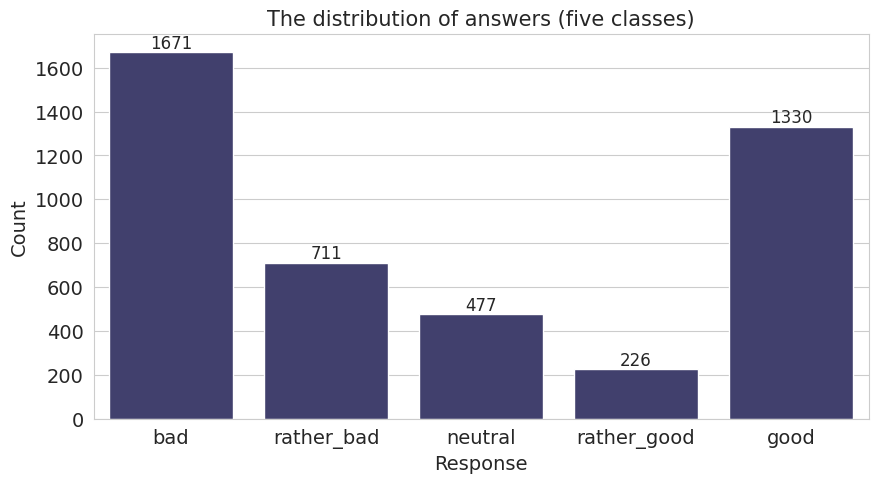

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=assessments, x="assessment", color="#3A3875", order=[-2, -1, 0, 1, 2])
ax.set_title("The distribution of answers (five classes)", fontsize=15)
ax.bar_label(ax.containers[0], fontsize=12)
custom_labels = ["bad", "rather_bad", "neutral", "rather_good", "good"]
ax.set_xticklabels(custom_labels)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
    
ax.set_xlabel('Response', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.show()

In [26]:
# Save dataset "assessments" for results analysis
DATASETS_DIR = BASE_DIR.joinpath('data/datasets')

FILE_NAME = "words_consistensy_model_agg.csv"

FILE = DATASETS_DIR.joinpath(FILE_NAME)

assessments.to_csv(FILE)

wordset + dataset_name aggregation

In [27]:
assessments2 = data.groupby(['INPUT:wordset', 'INPUT:dataset_name'])['OUTPUT:quality'].apply(list).reset_index()
assessments2.sample(5)

,INPUT:wordset,INPUT:dataset_name,OUTPUT:quality
975,drinking aftertaste mild espresso might weird ...,amazon_food,"[bad, rather_good, good, rather_bad, good, rat..."
2736,price phone bike sell email internet company o...,20newsgroups,"[good, bad, bad, bad, bad]"
1140,engineering music motorcycle letter weaver bru...,20newsgroups,"[bad, bad, bad, bad, rather_bad]"
1421,green protein powder meal vitamin mixed fiber ...,amazon_food,"[good, good, rather_bad, good, rather_good, ra..."
1008,driver sound card light crash running latest g...,20newsgroups,"[bad, rather_bad, bad, rather_good, rather_bad]"


In [28]:
assessments2['homogeneity'] = assessments2['OUTPUT:quality'].apply(lambda x: check_homogeneity(x))
assessments2.sample(5)

,INPUT:wordset,INPUT:dataset_name,OUTPUT:quality,homogeneity
3020,robert chicago jason info education member pre...,20newsgroups,"[rather_bad, bad, bad, rather_bad, bad]",0.6
216,back wonderful next life mouth issue thank lef...,amazon_food,"[rather_bad, bad, rather_bad]",0.7
435,breakfast packet indiv pour convenient wrap co...,amazon_food,"[bad, bad, bad]",1.0
3046,saturn nasa liar fool crazy dealer gsfc lunati...,20newsgroups,"[bad, bad, rather_bad, bad, bad]",0.8
3670,weapon firearm police auto safety semi handgun...,20newsgroups,"[rather_good, good, good, good, good]",0.8


In [29]:
print("Are there duplicates in the word sets?", bool(sum(assessments2['INPUT:wordset'].duplicated())))

Are there duplicates in the word sets? False


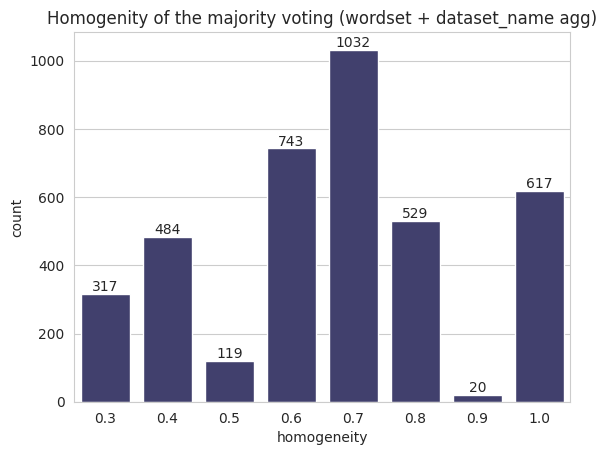

In [30]:
ax = sns.countplot(data=assessments2, x="homogeneity", color="#3A3875")
ax.set_title("Homogenity of the majority voting (wordset + dataset_name agg)")
ax.bar_label(ax.containers[0])

plt.show()

In [31]:
# get final assessment
assessments2['assessment'] = assessments2['OUTPUT:quality'].apply(lambda x: get_assessment(x))

/tmp/ipykernel_73614/1320230111.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_labels)


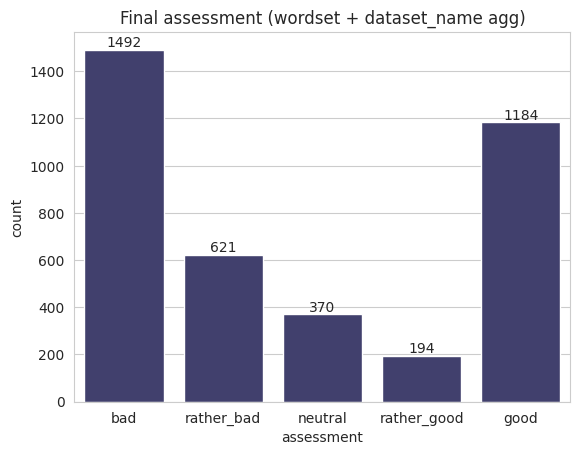

In [32]:
ax = sns.countplot(data=assessments2, x="assessment", color="#3A3875", order=[-2, -1, 0, 1, 2])
ax.set_title("Final assessment (wordset + dataset_name agg)")
ax.bar_label(ax.containers[0])

custom_labels = ["bad", "rather_bad", "neutral", "rather_good", "good"]
ax.set_xticklabels(custom_labels)

plt.show()

In [34]:
# Save dataset "assessments2" for calculations
DATASETS_DIR = BASE_DIR.joinpath('data/datasets')

FILE_NAME = "words_consistensy_wordset_dataset_agg.csv"

FILE = DATASETS_DIR.joinpath(FILE_NAME)

assessments2.to_csv(FILE, index=False)